# Plot CR gate time for transmon-fluxonium and transmon-transmon

In [1]:
import numpy as np
import time
import scipy.interpolate
import matplotlib.pyplot as plt
from typing import List, Dict, Callable
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
import copy
import json

from IPython.display import display, Latex

In [2]:
with open("data_cr_transmon_transmon/data_cr_transmon_transmon_fixed_drive_ratio.txt") as file_data:
    result_tt = json.load(file_data)
with open("data_cr_transmon_fluxonium/data_cr_transmon_fluxonium_fixed_drive_ratio.txt") as file_data:
    result_tf = json.load(file_data)

In [3]:
freq = []
gate_time_tt = []
gate_time_tf = []
for res_tt, res_tf in zip(result_tt, result_tf):
    freq.append(res_tf['freq'])
    gate_time_tt.append(1e3/(2*np.pi*np.abs(res_tt["cr"]))*np.pi/4)
    gate_time_tf.append(1e3/(2*np.pi*np.abs(res_tf["cr"]))*np.pi/4)

In [8]:
def plot_gate_time(
    freq: List,
    gate_time_tt: List,
    gate_time_tf: List,
    plot_setup={'fs': 22, 'lw': 2.0, 'lw_levels': 3.0, 'ls': 16, 'fsl':16},
    save=False
):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.semilogy(freq, gate_time_tt, linewidth=plot_setup["lw"], linestyle='-', color='black', label='Transmon-Transmon')
    ax.semilogy(freq, gate_time_tf, linewidth=plot_setup["lw"], linestyle='--', color='black', label='Transmon-Fluxonium')
    ax.set_xlabel("$\omega_t/2 \pi \, (\mathrm{GHz})$", fontsize=plot_setup["fs"])
    x_ticks = [4.2 + 0.2*x for x in range(9)]
    ax.set_xticks(x_ticks)
    x_ticks_latex = ['$' + str(x)[:3] + '$' for x in x_ticks]
    ax.set_xticklabels(x_ticks_latex)
    y_ticks = [100, 1000]
    ax.set_yticks(y_ticks)
    y_ticks_latex = ['$10^2$', '$10^3$']
    ax.set_yticklabels(y_ticks_latex)
    ax.tick_params(axis='both', labelsize=plot_setup["ls"])
    ax.set_ylabel("$t_{\\mathrm{gate}} \, (\\mathrm{ns})$", fontsize=plot_setup["fs"])
    ax.legend(loc='upper center', fontsize=plot_setup["fsl"])
    if save:
        plt.savefig("gate_time_tt_vs_tf.svg")
    plt.show()

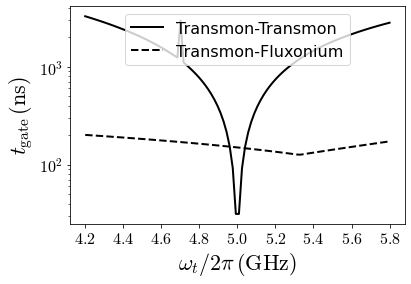

In [9]:
plot_gate_time(freq, gate_time_tt, gate_time_tf, save=True)